In [1]:
#  ##################################################
#  ##                what is this?                 ##
#  ##################################################
#  
#  this example will try to fit an entire spice simulation of a circuit
#  with variable components (in this case C1 and C2) to have a certain impulse response
#  
#  in other words: let's not just fit a function to data,
#  let's fit an entire circuit to data!

In [2]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter, get_impulse_response
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "ltspice_fit_impulse_response/filter_circuit.asc"


Found Numpy. WIll be used for storing data


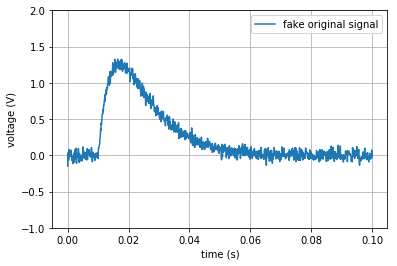

In [3]:
##################################################
##             generate test signal             ##
##################################################

# our samples shall be 100 ms wide
sample_width=100e-3
# time step between samples: 0.1 ms
delta_t=0.1e-3
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)

# we want 1 V between 10 ms and 30 ms, and 2.5 V between 40 and 70 ms
time_offset = 10e-3
time_ = time-time_offset
signal_a = 0 + 5*((time > time_offset)*(np.exp(-time_/10e-3) *(1-np.exp(-time_/10e-3)) )  )

# add some noise
signal_a += np.random.normal(0,0.05,samples)

plt.plot(time,signal_a, label="fake original signal")
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.ylim((-1,2))
plt.grid(True)

plt.legend()
plt.show()


In [4]:
##################################################
##      apply filter - get impulse response     ##
##################################################

# all values in SI units
configuration_1 = {
  "C1":100e-6, # 100 uF
  "C2":100e-6 # 100 uF
}

dummy, filter_ir = get_impulse_response(
      circuit_file,
      params=configuration_1,
      ltspice_command = ltspice_command,
      sample_width = sample_width,
      delta_t = delta_t
      )


Normal access


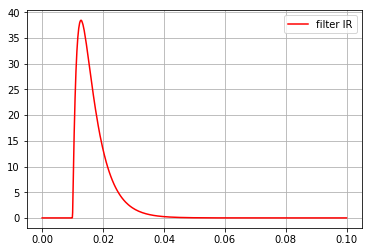

In [6]:
##################################################
##            plot impulse response             ##
##################################################


plt.plot(time,filter_ir,"r",label="filter IR")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
##################################################
##    fit circuit parameters to test signal     ##
##################################################


def func(x, a, b, c):
    
    # a is amplitude factor
    
    # all values in SI units
    configuration = {
      "C1":b,
      "C2":c
    }
    
    # call ltspice to get impulse response from circuit
    dummy, filter_ir = get_impulse_response(
          circuit_file,
          params=configuration,
          ltspice_command = ltspice_command,
          sample_width = sample_width,
          delta_t = delta_t
          )
    return a*filter_ir


# start parameters and parameter bounds
#          a       b(C1)  c(C2)
p0  =    [1./40 ,100e-6 ,100e-6]
param_bounds=(
         [0     ,0      ,0      ],
         [100   ,2000e-6,2000e-6])
popt, pcov = curve_fit(func, time, signal_a, p0 = p0, bounds=param_bounds)



sig_in.csv has not changed
trancmd.txt has not changed
param.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
input data did not change, reading existing .raw file
Normal access
sig_in.csv has not changed
trancmd.txt has not changed
param.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
input data did not change, reading existing .raw file
Normal access
sig_in.csv has not changed
trancmd.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
Normal access
sig_in.csv has not changed
trancmd.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
Normal access
sig_in.csv has not changed
trancmd.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
Normal access
sig_in.csv has not changed
trancmd.txt has not changed
param.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
input data did not change, reading existing .raw file
Normal access
sig_in.csv has not changed
trancmd

sig_in.csv has not changed
trancmd.txt has not changed
filter_circuit.asc is older than filter_circuit.raw
Normal access


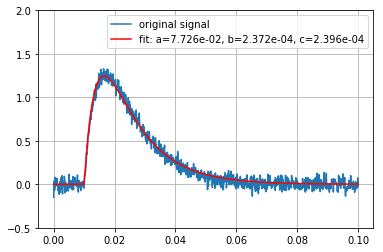

In [8]:
##################################################
##         plot fit against input data          ##
##################################################


plt.plot(time,signal_a, label="original signal")
plt.plot(time, func(time, *popt), 'r-',
         label='fit: a=%5.3e, b=%5.3e, c=%5.3e' % tuple(popt))
plt.grid(True)
plt.ylim(-0.5, 2)
plt.legend()
plt.show()
